In [1]:
# ===============================================================
# ANALISIS DATA PENJUALAN - DIVISI PEMASARAN 
# ===============================================================

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore") 

# ---------------------------------------------------------------
# Fungsi bantu: Format nilai Rupiah (jutaan/miliar)
# ---------------------------------------------------------------
def format_rupiah(value):
    if value >= 1_000_000_000:
        return f"{value/1_000_000_000:.2f} Miliar"
    elif value >= 1_000_000:
        return f"{value/1_000_000:.2f} Juta"
    elif value >= 1_000:
        return f"{value/1_000:.2f} Ribu"
    else:
        return f"{value:.0f}"

# ---------------------------------------------------------------
# 1. Membaca data
# ---------------------------------------------------------------
df = pd.read_csv(r'D:\Semester 5\Visual dan interpretasi data\uts\Copy of finalProj_df - df.csv')
df['order_date'] = pd.to_datetime(df['order_date'])

print("Preview Dataset:")
display(df.head())





Preview Dataset:


,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,cogs,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,category,registered_date
0,ODR1510991605c,C206125L,2022-08-06,P313303,518752,1000,518752000,0,518752000,484822,1,0,0,2,jazzvoucher,IDROID_BALRX7-Gold,550942,Mobiles & Tablets,2021-08-19
1,ODR4269164386x,C460487L,2022-09-06,P313303,518752,1000,518752000,0,518752000,484822,1,1,1,2,jazzvoucher,IDROID_BALRX7-Gold,550942,Mobiles & Tablets,2022-06-21
2,ODR9858888901n,C960097L,2022-04-16,P547091,8410,300,2523000,0,2523000,6902,1,0,0,1,cod,RS_Coconut Bites,8120,Soghaat,2022-04-10
3,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,18270,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,Others,2021-07-07
4,ODR8297660205y,C175928L,2022-06-29,P467533,2870,200,574084,0,574084,2378,1,0,0,5,jazzwallet,Darul_Sakoon_Food_Bundle,2870,Superstore,2022-05-13


In [2]:
# ---------------------------------------------------------------
# 2. KPI / Ringkasan Kinerja Utama
# ---------------------------------------------------------------
total_sales = df['after_discount'].sum()
total_orders = df['id'].nunique() if 'id' in df.columns else len(df)
avg_price = df['price'].mean()
top_category = df['category'].value_counts().idxmax()
top_payment = df['payment_method'].value_counts().idxmax()

print("\nRINGKASAN KINERJA (KPI):")
print(f"Total Penjualan: Rp {format_rupiah(total_sales)}")
print(f"Total Transaksi: {total_orders:,}")
print(f"Rata-rata Harga Produk: Rp {format_rupiah(avg_price)}")
print(f"Kategori Terlaris: {top_category}")
print(f"Metode Pembayaran Terpopuler: {top_payment}")

# ---------------------------------------------------------------
# Tema warna dan layout (Plotly global setting)
# ---------------------------------------------------------------
px.defaults.template = "plotly_white"
px.defaults.width = 900
px.defaults.height = 500

# Warna utama
main_blue = '#1f77b4'     # biru terang
highlight_orange = '#ff7f0e'  # oranye kontras
soft_gray = '#e0e0e0'     # abu muda background
dark_text = '#333333'


RINGKASAN KINERJA (KPI):
Total Penjualan: Rp 8.66 Miliar
Total Transaksi: 5,764
Rata-rata Harga Produk: Rp 1.06 Juta
Kategori Terlaris: Mobiles & Tablets
Metode Pembayaran Terpopuler: cod


In [3]:
# ---------------------------------------------------------------
# 3. Tren Penjualan per Bulan
# ---------------------------------------------------------------
df['month'] = df['order_date'].dt.to_period('M').astype(str)
sales_by_month = df.groupby('month')['after_discount'].sum().reset_index()
sales_by_month['after_discount_m'] = sales_by_month['after_discount'] / 1_000_000

fig1 = px.line(
    sales_by_month, x='month', y='after_discount_m',
    title='Tren Penjualan per Bulan (dalam Juta Rupiah)',
    markers=True, color_discrete_sequence=[main_blue]
)
fig1.update_traces(line=dict(width=4))
fig1.update_layout(
    plot_bgcolor=soft_gray,
    font=dict(family="Segoe UI", size=13, color=dark_text),
    title_font=dict(size=18, color=dark_text)
)
fig1.show()

In [4]:
# ---------------------------------------------------------------
# 4. Penjualan per Kategori Produk
# ---------------------------------------------------------------
sales_by_category = (
    df.groupby('category')['after_discount']
    .sum()
    .reset_index()
    .sort_values('after_discount', ascending=True)
)
sales_by_category['after_discount_m'] = sales_by_category['after_discount'] / 1_000_000
x_limit = sales_by_category['after_discount_m'].max() * 1.15

fig2 = px.bar(
    sales_by_category,
    x='after_discount_m',
    y='category',
    orientation='h',
    color='after_discount_m',
    color_continuous_scale=['#aec7e8', '#1f77b4'],
    title='Total Penjualan per Kategori Produk (dalam Juta Rupiah)',
    text='after_discount_m'
)
fig2.update_traces(texttemplate='%{text:.1f} Jt', textposition='outside')
fig2.update_layout(
    plot_bgcolor=soft_gray,
    xaxis_title="Total Penjualan (Juta Rupiah)",
    yaxis_title="Kategori Produk",
    font=dict(family="Segoe UI", size=13, color=dark_text),
    xaxis_range=[0, x_limit],
    margin=dict(r=80)
)
fig2.show()

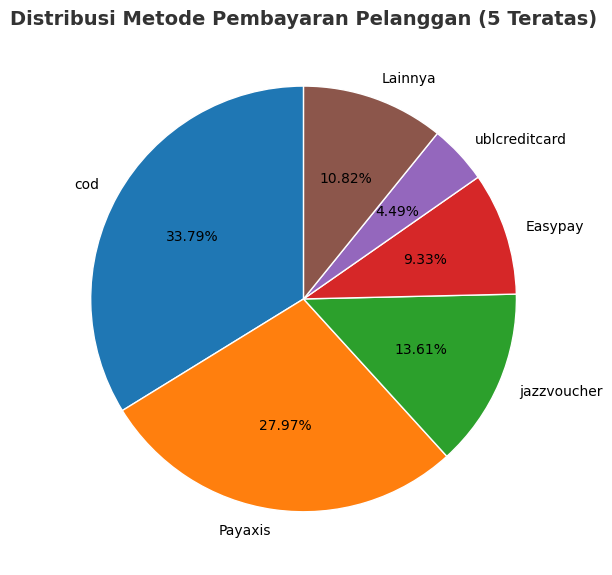

In [5]:
# ---------------------------------------------------------------
# 5. Distribusi Metode Pembayaran
# ---------------------------------------------------------------
payment_summary = (
    df.groupby('payment_method')['after_discount']
    .sum()
    .reset_index()
    .sort_values('after_discount', ascending=False)
)
top_payment_methods = payment_summary.head(5)
others_total = payment_summary['after_discount'][5:].sum()

if others_total > 0:
    top_payment_methods = pd.concat([
        top_payment_methods,
        pd.DataFrame({'payment_method': ['Lainnya'], 'after_discount': [others_total]})
    ])

# Warna kontras dan mudah dibaca
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(6,6))
plt.pie(
    top_payment_methods['after_discount'],
    labels=top_payment_methods['payment_method'],
    autopct="%.2f%%",
    startangle=90,
    colors=colors[:len(top_payment_methods)],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
plt.title("Distribusi Metode Pembayaran Pelanggan (5 Teratas)",
          fontsize=14, fontweight='bold', color=dark_text)
plt.tight_layout()
plt.show()

In [6]:
# ---------------------------------------------------------------
# 6. Top 10 Produk Terlaris
# ---------------------------------------------------------------
top_products = (
    df.groupby('sku_name')['after_discount']
    .sum().reset_index()
    .sort_values('after_discount', ascending=False)
    .head(10)
)
top_products['after_discount_m'] = top_products['after_discount'] / 1_000_000
x_limit = top_products['after_discount_m'].max() * 1.15

fig4 = px.bar(
    top_products,
    x='after_discount_m',
    y='sku_name',
    orientation='h',
    color='after_discount_m',
    color_continuous_scale=['#ffbb78', '#ff7f0e'],
    title='Top 10 Produk Terlaris (dalam Juta Rupiah)',
    text='after_discount_m'
)
fig4.update_traces(
    texttemplate='%{text:.1f} Jt',
    textposition='outside',
    marker_line_color='gray',
    marker_line_width=0.8,
    opacity=0.95
)
fig4.update_layout(
    plot_bgcolor=soft_gray,
    xaxis_title="Total Penjualan (Juta Rupiah)",
    yaxis_title="Nama Produk",
    font=dict(family="Segoe UI", size=13, color=dark_text),
    title_font=dict(size=18, color=dark_text),
    showlegend=False,
    bargap=0.3,
    xaxis_range=[0, x_limit]
)
fig4.update_yaxes(categoryorder='total ascending')
fig4.show()

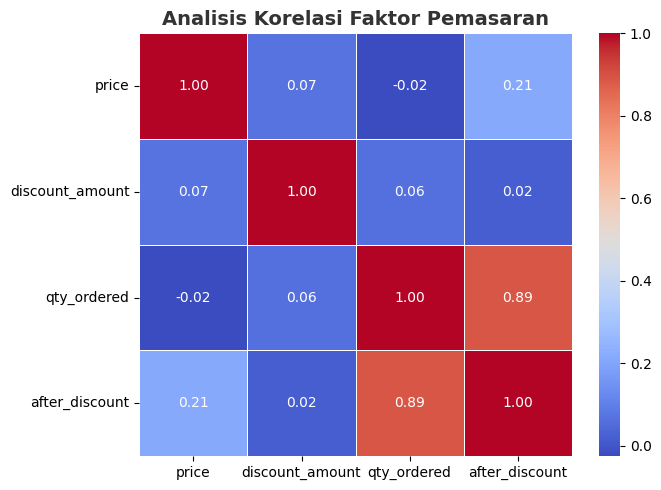

In [7]:
# ---------------------------------------------------------------
# 7. Analisis Korelasi Faktor Pemasaran
# ---------------------------------------------------------------
corr_columns = ['price', 'discount_amount', 'qty_ordered', 'after_discount']
corr_df = df[corr_columns].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Analisis Korelasi Faktor Pemasaran", fontsize=14, fontweight="bold", color=dark_text)
plt.tight_layout()
plt.show()